In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#**Content**
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

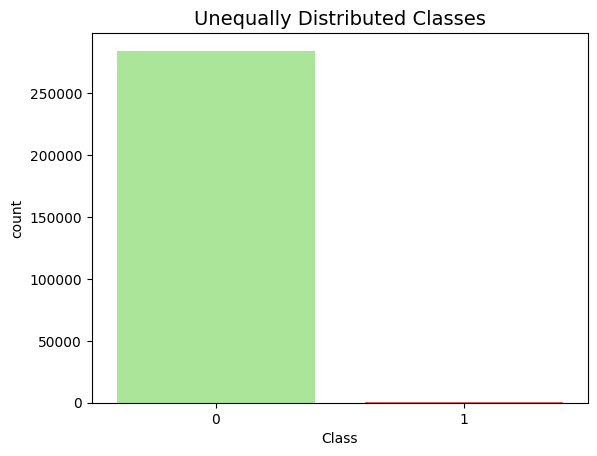

In [ ]:
sns.countplot(x='Class', data=df, palette=['#A4F28C', "#F0544F"])
plt.title('Unequally Distributed Classes', fontsize=14)
plt.show()

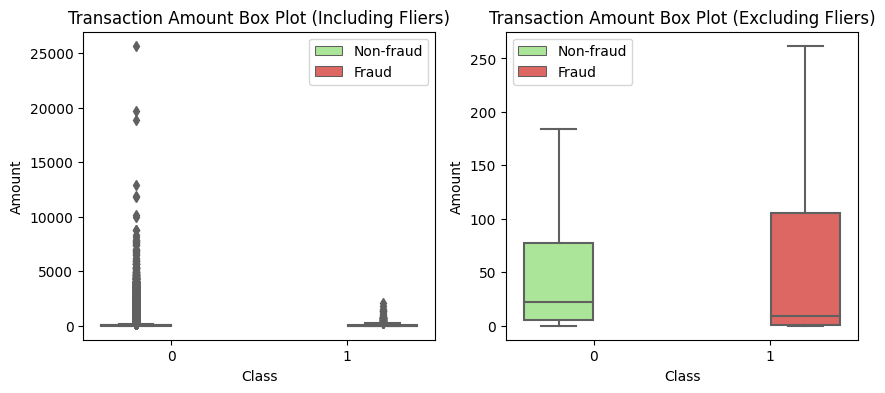

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=['#A4F28C' , "#F0544F"],
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="Class", 
            y="Amount", 
            hue="Class",
            palette=['#A4F28C', "#F0544F"],
            showfliers=False,
            ax=ax[1])

ax[0].set_title("Transaction Amount Box Plot (Including Fliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Fliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum().max()

0

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##**Class Distribution**

In [ ]:
n_fraud_transactions, n_non_fraud_transactions = df.loc[:,['Class']].value_counts()

print('Total fraud transaction is ',round(n_fraud_transactions/len(df) * 100,3),'% of the dataset')
print('Total non fraud transaction is ',round(n_non_fraud_transactions/len(df) * 100,3),'% of the dataset')

Total fraud transaction is  99.827 % of the dataset
Total non fraud transaction is  0.173 % of the dataset


##**Identifying Relationship between features/Correlation matrix**

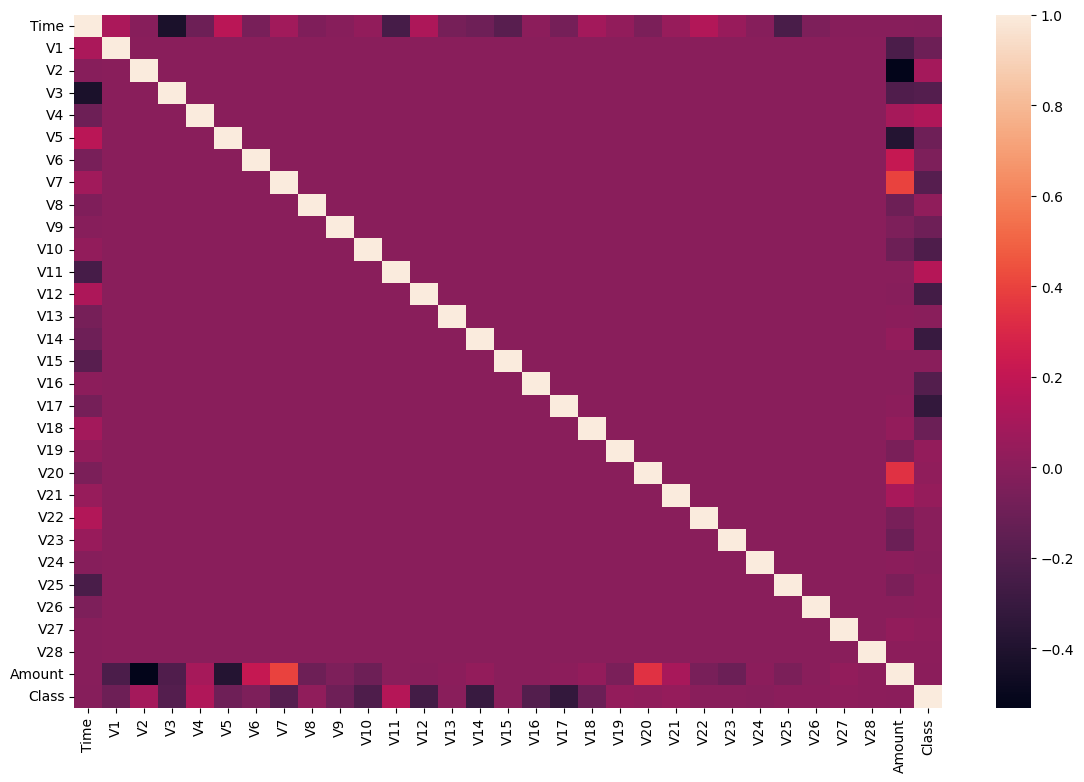

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=False,annot_kws={"size":6})
plt.show()

##**Observation**
As we know that all the unknown features are already scaled and PCA transformation is applied (dimentionality reduction). We will scale the time and amount feature.


---
Purpose of Scaling : 
Values of all the parameters except amount and time lies between -1 to 1. This makes the model concentrate/biased on the parameters with higher values like Amount and Time which can lead to overfitting.  


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1,1))
scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
time = df.drop(['Time'], axis = 1, inplace=True)
amount = df.drop(['Amount'], axis = 1, inplace=True)
df.insert(0,'Scaled Time',scaled_time)
df.insert(1,'Scaled Amount',scaled_amount)
df.head()

,Scaled Time,Scaled Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##**We will approach the problem of unbalanced dataset with two techniques (Undersampling and Oversampling).**





##**UnderSampling**

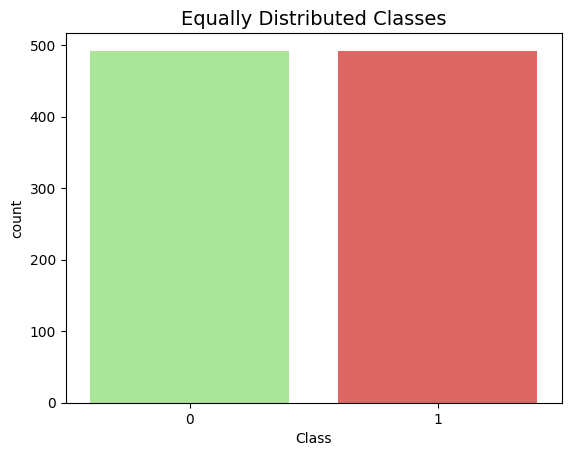

In [ ]:
fraud_samples = df.loc[df['Class'] == 1]
non_fraud_samples = df.loc[df['Class'] == 0][:492]

under_sample = pd.concat([fraud_samples,non_fraud_samples])
under_sample_df = under_sample.sample(frac = 1,random_state=42)

sns.countplot(x='Class', data=under_sample_df, palette=['#A4F28C', "#F0544F"])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

After undersampling, the non-fraud transaction are reduced to balance out with fraud transactions- this method reduces the overall volume of the dataset.

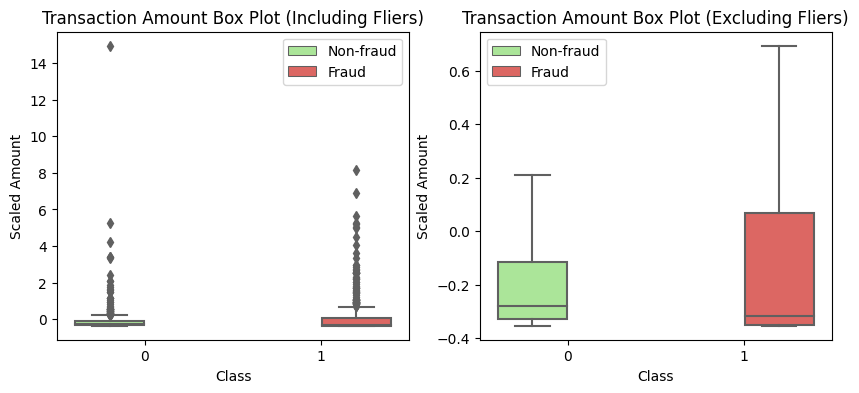

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.boxplot(data=under_sample_df, 
            x="Class", 
            y="Scaled Amount", 
            hue="Class",
            palette=['#A4F28C' , "#F0544F"],
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=under_sample_df, 
            x="Class", 
            y="Scaled Amount", 
            hue="Class",
            palette=['#A4F28C', "#F0544F"],
            showfliers=False,
            ax=ax[1])

ax[0].set_title("Transaction Amount Box Plot (Including Outliers)")
ax[1].set_title("Transaction Amount Box Plot (Excluding Outliers)")

# Update legend labels
legend_labels = ['Non-fraud', 'Fraud']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)

plt.show()

###Identifying Relation between features after Under Sampling



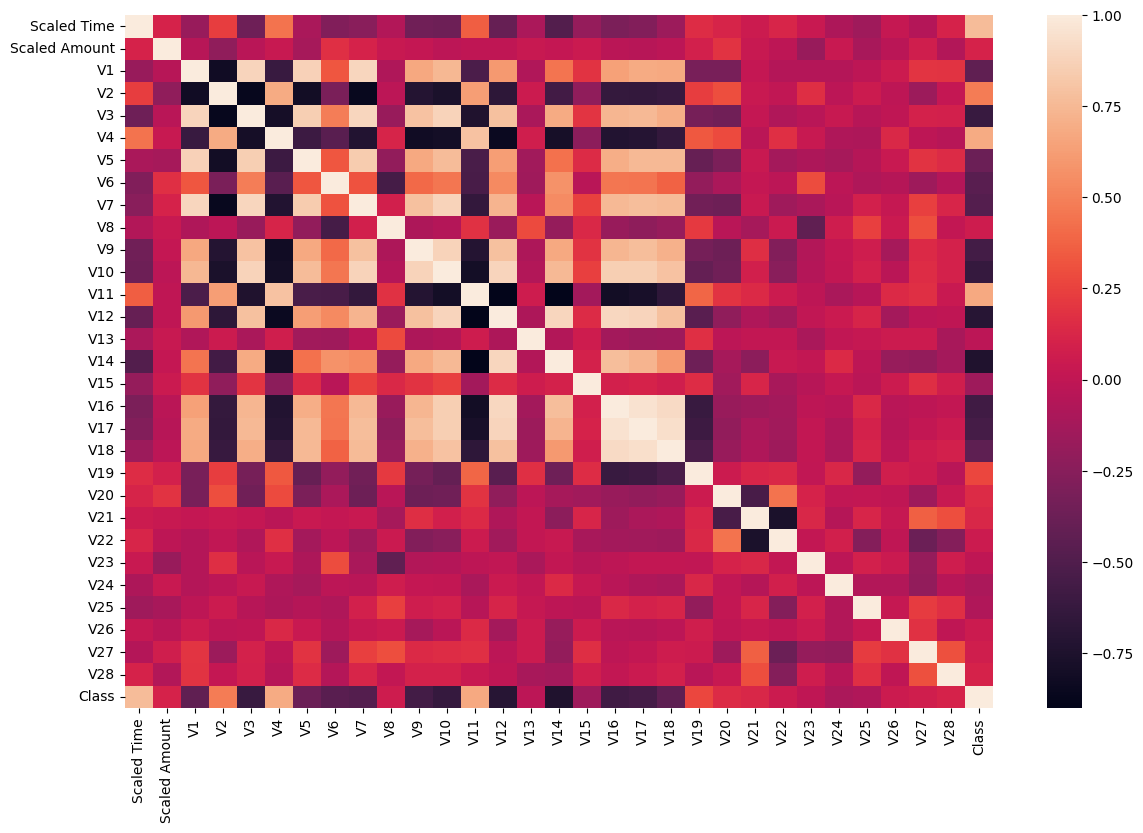

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(under_sample_df.corr(),annot=False,annot_kws={"size":6})
plt.show()

###Exploratory Data Analysis


---
Taking the above correlation matrix into account, we will select the features having maximum correlation with the **Class** feature.

Negatively Correlated Features : V3, V10, V12, V14

Positively Correlated Features : V2, V4, V11, V19





###Positively Correlated Features

Text(0.5, 1.0, 'V19 vs Class (Positive Correlation)')

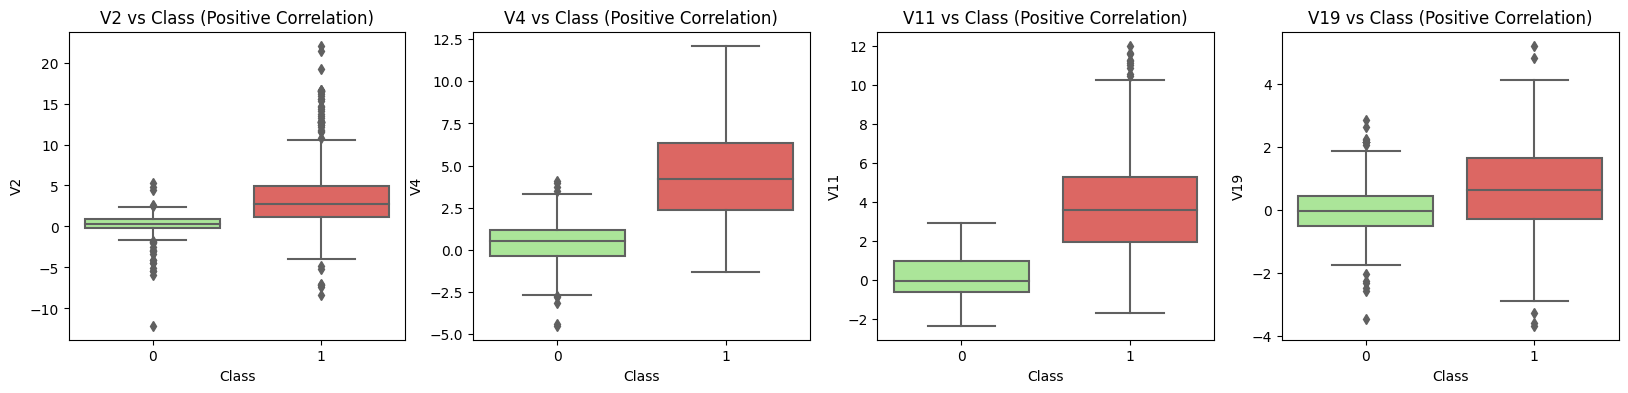

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V11", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V19", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[3])
axes[3].set_title('V19 vs Class (Positive Correlation)')


###Negatively Correlated Features

Text(0.5, 1.0, 'V14 vs Class (Negative Correlation)')

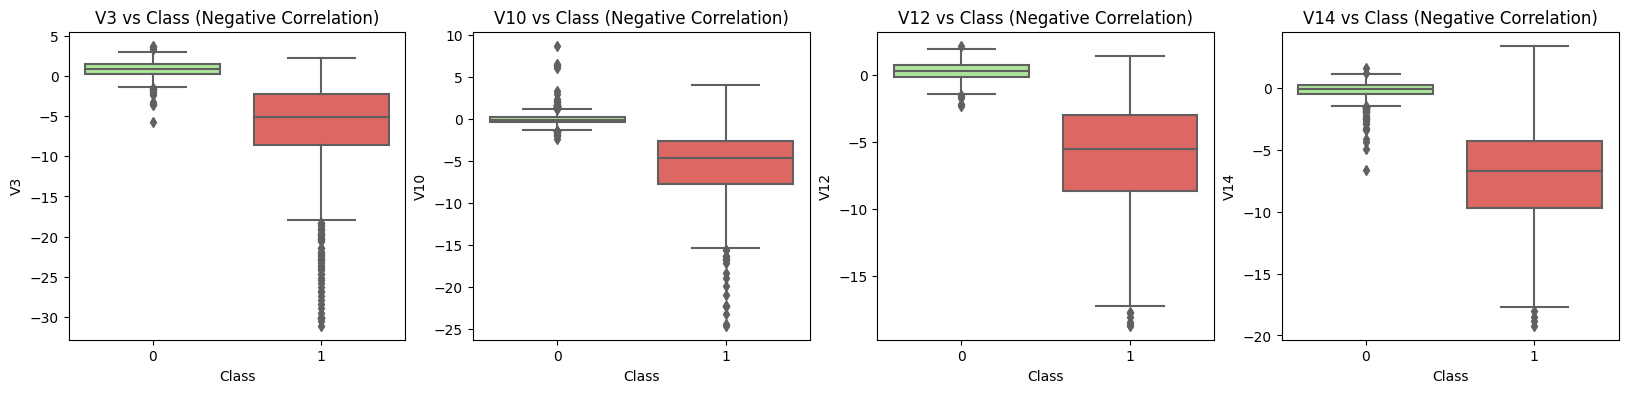

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V3", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[0])
axes[0].set_title('V3 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V10", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[1])
axes[1].set_title('V10 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[2])
axes[2].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=under_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[3])
axes[3].set_title('V14 vs Class (Negative Correlation)')

###Detection and Removal of Outliers

---
Noticing the above features, maximum outliers lies in features  :- V2, V3 and V10.

Hence we will remove the outliers of those features only for now.


Text(0.5, 1.0, 'V10 vs Class (Negative Correlation)')

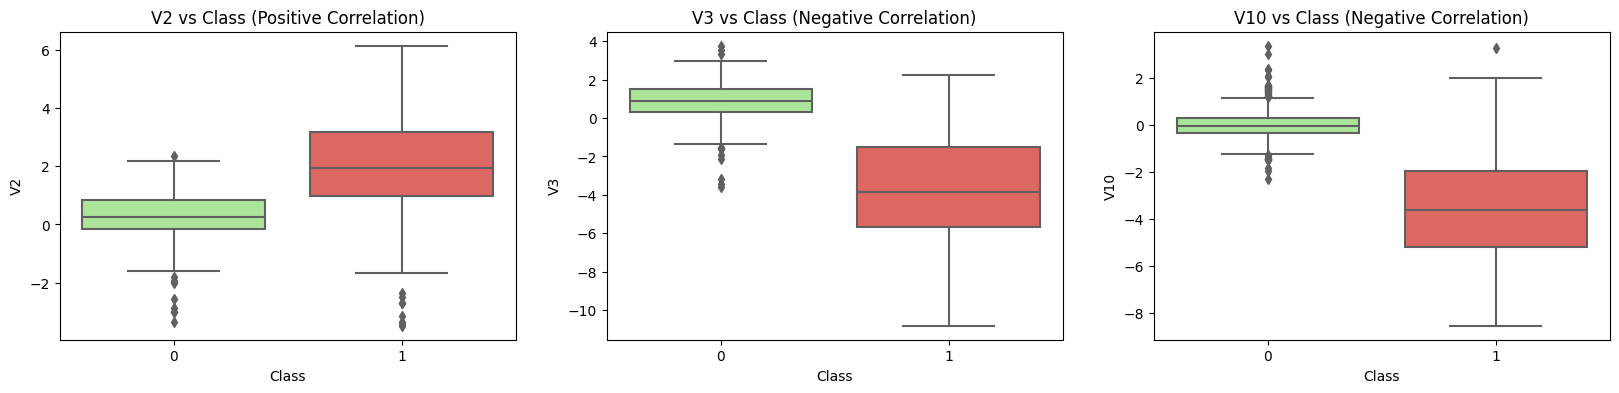

In [ ]:
def remove_outliers(feature,df):
  fraud_array = df[feature].values
  q1 = np.percentile(fraud_array,25)
  q3 = np.percentile(fraud_array,75)
  iqr = q3 - q1
  minimum = q1 - (1.5 * iqr)
  maximum = q3 + (1.5 * iqr)
  outlier_free_under_sample_df = df.drop(df[(df[feature] < minimum) | (df[feature] > maximum)].index,axis = 0,inplace = False)
  return outlier_free_under_sample_df

outlier_free_under_sample_df = remove_outliers('V2',under_sample_df)
outlier_free_under_sample_df = remove_outliers('V3',outlier_free_under_sample_df)
outlier_free_under_sample_df = remove_outliers('V10',outlier_free_under_sample_df)

f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(x="Class", y="V2", data=outlier_free_under_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')
sns.boxplot(x="Class", y="V3", data=outlier_free_under_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[1])
axes[1].set_title('V3 vs Class (Negative Correlation)')
sns.boxplot(x="Class", y="V10", data=outlier_free_under_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[2])
axes[2].set_title('V10 vs Class (Negative Correlation)')


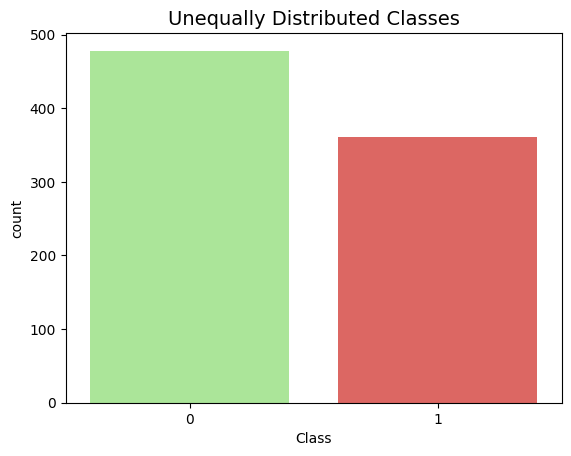

In [ ]:
sns.countplot(x='Class', data=outlier_free_under_sample_df, palette=['#A4F28C', "#F0544F"])
plt.title('Slightly unequally Distributed Classes', fontsize=14)
plt.show()

###ML Modelling and Accuracy

Classifier: LogisticRegression
Confusion Matrix:
 [[144   2]
 [  1 105]]
F1 Score:  0.9881027286283566
Precision:  0.9881420437978606
Recall:  0.9880952380952381
Accuracy:  0.9880952380952381
-----------------------------

Classifier: KNearest
Confusion Matrix:
 [[141   5]
 [  6 100]]
F1 Score:  0.9563202578585204
Precision:  0.9563222114242522
Recall:  0.9563492063492064
Accuracy:  0.9563492063492064
-----------------------------

Classifier: DecisionTreeClassifier
Confusion Matrix:
 [[146   0]
 [  0 106]]
F1 Score:  1.0
Precision:  1.0
Recall:  1.0
Accuracy:  1.0
-----------------------------

Classifier: RandomForestClassifier
Confusion Matrix:
 [[144   2]
 [  0 106]]
F1 Score:  0.99207321128043
Precision:  0.9922104644326867
Recall:  0.9920634920634921
Accuracy:  0.9920634920634921
-----------------------------



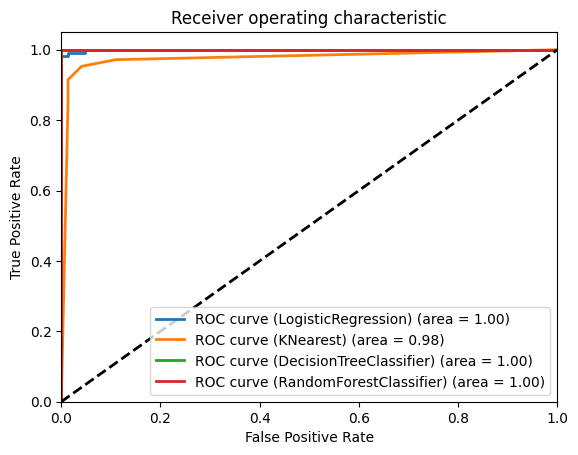

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
plt.figure()

X = outlier_free_under_sample_df.drop('Class', axis=1)
y = outlier_free_under_sample_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier()
}

for key, classifier in classifiers.items():
    model = classifier
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    y_score = model.predict_proba(X_test)[:, 1] 
    # Compute metrics
    confusion_mat = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Classifier: {key}")
    print("Confusion Matrix:\n", confusion_mat)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Accuracy: ", accuracy)
    print("-----------------------------\n")

      # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve ({key}) (area = {roc_auc:.2f})')

# Plotting ROC curve settings
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# #Calculate the cross-validation score for each classifier
# print('Cross-Validation Scores:-')
# for key, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
#     print('{}: {}'.format(key,round(cv_score.mean()*100.0, 2)))


###DL/NN Modelling and Accuracy

Epoch 1/10
19/19 [==============================] - 3s 30ms/step - loss: 0.6046 - accuracy: 0.5639 - val_loss: 0.5015 - val_accuracy: 0.6468
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.5001 - accuracy: 0.6576 - val_loss: 0.4496 - val_accuracy: 0.7619
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.4464 - accuracy: 0.7666 - val_loss: 0.4098 - val_accuracy: 0.8254
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.4064 - accuracy: 0.8671 - val_loss: 0.3768 - val_accuracy: 0.8889
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.3735 - accuracy: 0.9114 - val_loss: 0.3490 - val_accuracy: 0.9206
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.3457 - accuracy: 0.9233 - val_loss: 0.3252 - val_accuracy: 0.9246
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.3210 - accuracy: 0.9250 - val_loss: 0.3040 - val_accuracy: 0.9286
Epoch 8/10
19

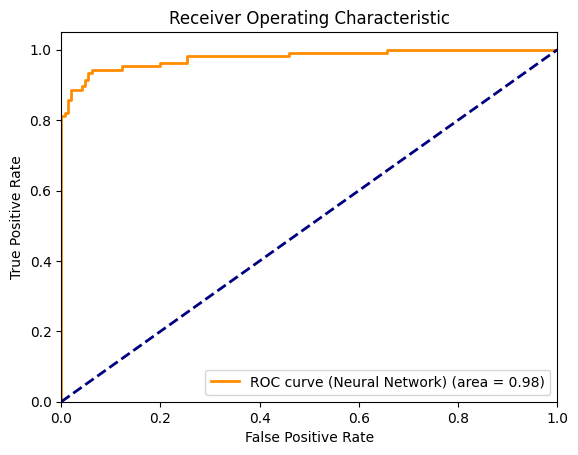

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential(
    [
        InputLayer(input_shape=(30,)),
        Dense(25, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
NN_pred = model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in NN_pred]
confusion_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"Classifier: Neural Network")
print("Confusion Matrix:\n", confusion_mat)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)
print("-----------------------------\n")

fpr, tpr, _ = roc_curve(y_test, NN_pred)
roc_auc = auc(fpr, tpr)
    
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Neural Network) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##**Oversampling method: SMOTE (Synthetic Minority Over-sampling Technique)**

Addressing imbalanced datasets often necessitates a more nuanced strategy for equalizing the classes. One such technique is Synthetic Minority Over-sampling Technique (SMOTE), which attempts to stabilize the dataset by producing synthetic examples of the minority class, instead of just duplicating or deleting instances, as done in conventional oversampling or undersampling methods.

SMOTE operates by identifying examples from the minority class that are close in terms of feature space, and then fabricating new instances between them. This approach not only enriches the diversity and representation of the minority class instances but also enhances the model's generalization abilities to new, unseen instances.

By utilizing SMOTE, it not only rectifies the imbalance problem but also mitigates the risk of overfitting associated with random oversampling. Moreover, it avoids the potential loss of valuable information that could occur due to random undersampling. Incorporating SMOTE into the training regimen allows us to build a more resilient fraud detection model that excels at recognizing suspicious activities while keeping false positives at an acceptable level.

In [ ]:
df.head()

,Scaled Time,Scaled Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop(['Class'], axis = 1, inplace=False)
y= df['Class']

print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

sm = SMOTE(random_state=42)
X_over_sample, y_over_sample = sm.fit_resample(X, y)

print("After OverSampling, counts of label '1': {}".format(sum(y_over_sample == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_over_sample == 0)))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over_sample, y_over_sample, stratify=y_over_sample, random_state=42,test_size=0.3)

over_sample_df = pd.DataFrame(X_over_sample, columns=X.columns)
over_sample_df['Class'] = y_over_sample

over_sample_df.head()

Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 

After OverSampling, counts of label '1': 284315
After OverSampling, counts of label '0': 284315


,Scaled Time,Scaled Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


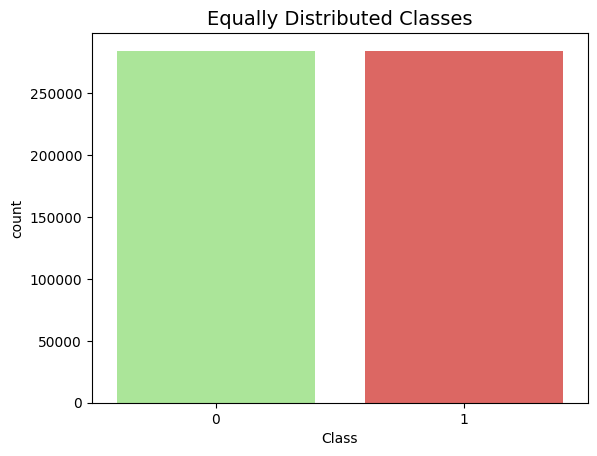

In [ ]:
sns.countplot(x='Class', data=over_sample_df, palette=['#A4F28C', "#F0544F"])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

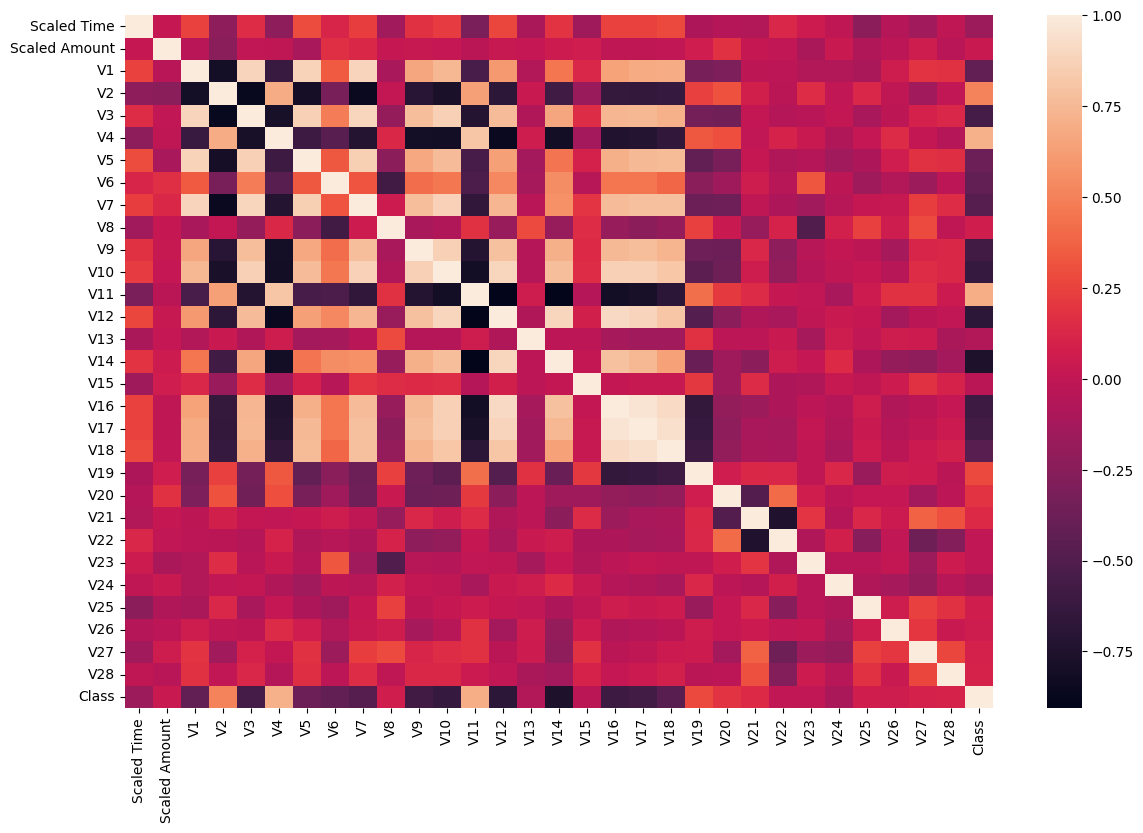

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(over_sample_df.corr(),annot=False,annot_kws={"size":6})
plt.show()

##Exploratory Data Analysis


---
Taking the above correlation matrix into account, we will select the features having maximum correlation with the **Class** feature.

Negatively Correlated Features : V3, V10, V12, V14

Positively Correlated Features : V2, V4, V11, V19





###Positively Correlated Features

Text(0.5, 1.0, 'V19 vs Class (Positive Correlation)')

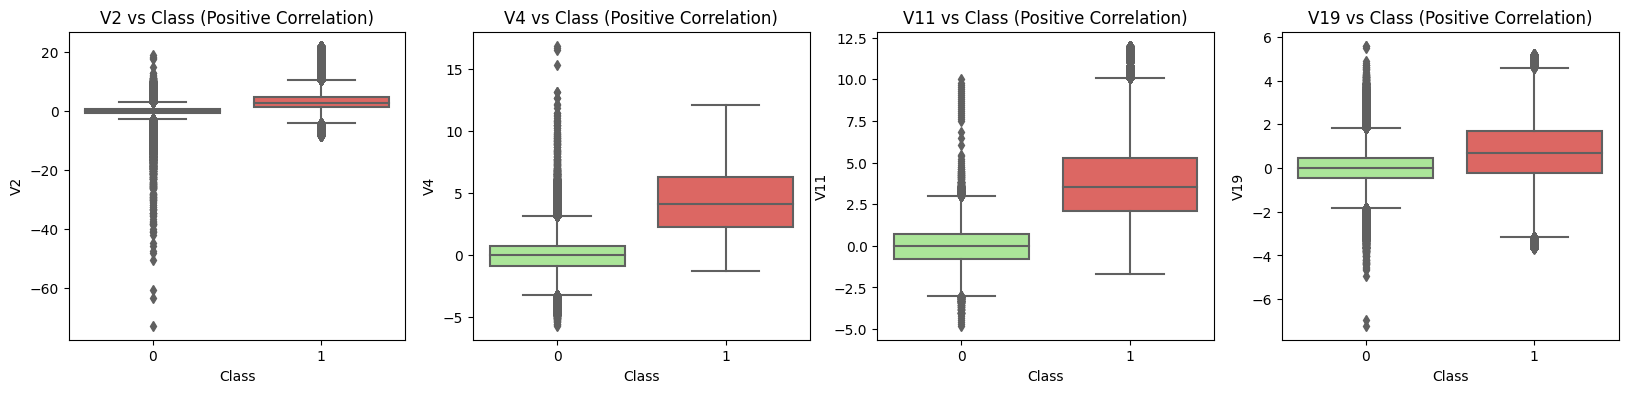

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V4", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[1])
axes[1].set_title('V4 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V11", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[2])
axes[2].set_title('V11 vs Class (Positive Correlation)')

sns.boxplot(x="Class", y="V19", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[3])
axes[3].set_title('V19 vs Class (Positive Correlation)')


###Negatively Correlated Features

Text(0.5, 1.0, 'V14 vs Class (Negative Correlation)')

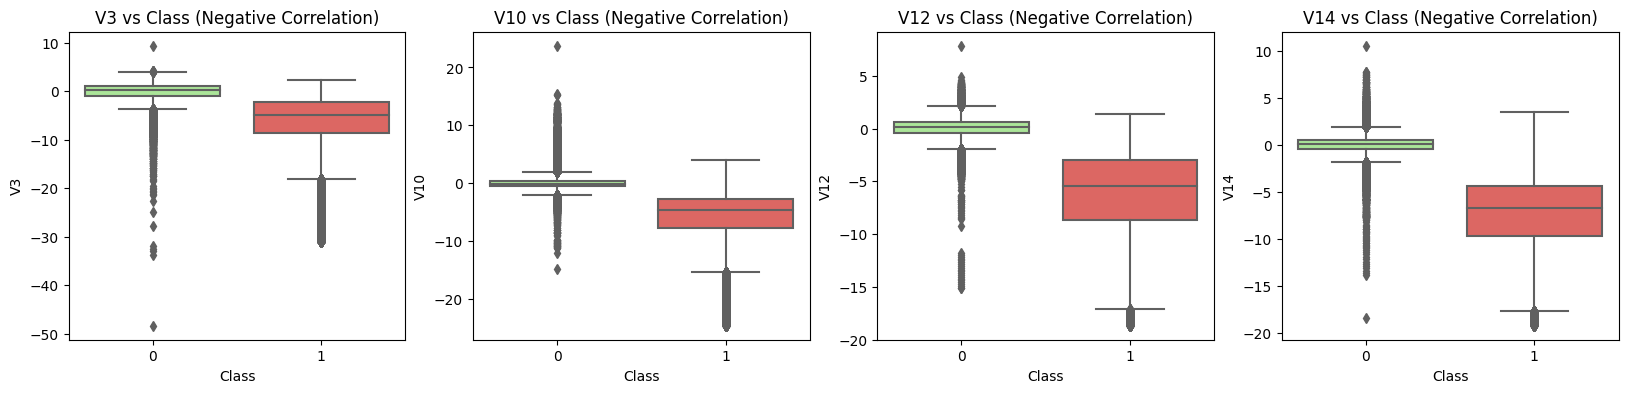

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V3", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[0])
axes[0].set_title('V3 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V10", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[1])
axes[1].set_title('V10 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V12", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[2])
axes[2].set_title('V12 vs Class (Negative Correlation)')

sns.boxplot(x="Class", y="V14", data=over_sample_df, palette=['#A4F28C', "#F0544F"], ax=axes[3])
axes[3].set_title('V14 vs Class (Negative Correlation)')

###Detection and Removal of Outliers

---
Noticing the above features, maximum outliers lies in features  :- V2, V3 and V10.

Hence we will remove the outliers of those features only for now.


Text(0.5, 1.0, 'V10 vs Class (Negative Correlation)')

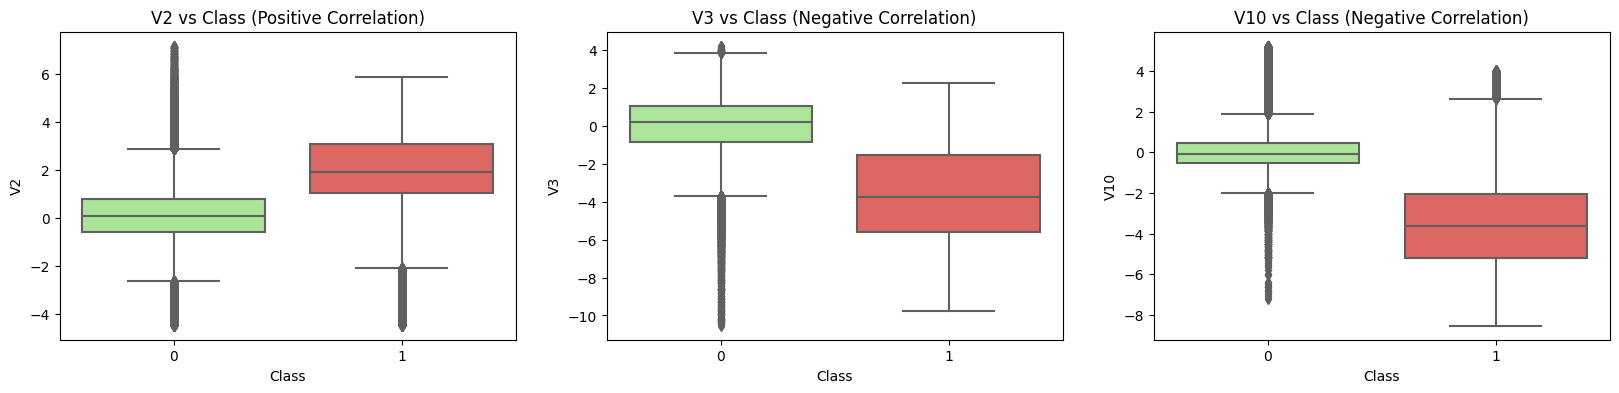

In [ ]:
def remove_outliers(feature,df):
  fraud_array = df[feature].values
  q1 = np.percentile(fraud_array,25)
  q3 = np.percentile(fraud_array,75)
  iqr = q3 - q1
  minimum = q1 - (1.5 * iqr)
  maximum = q3 + (1.5 * iqr)
  outlier_free_over_sample_df = df.drop(df[(df[feature] < minimum) | (df[feature] > maximum)].index,axis = 0,inplace = False)
  return outlier_free_over_sample_df

outlier_free_over_sample_df = remove_outliers('V2',over_sample_df)
outlier_free_over_sample_df = remove_outliers('V3',outlier_free_over_sample_df)
outlier_free_over_sample_df = remove_outliers('V10',outlier_free_over_sample_df)

f, axes = plt.subplots(ncols=3, figsize=(20,4))
sns.boxplot(x="Class", y="V2", data=outlier_free_over_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[0])
axes[0].set_title('V2 vs Class (Positive Correlation)')
sns.boxplot(x="Class", y="V3", data=outlier_free_over_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[1])
axes[1].set_title('V3 vs Class (Negative Correlation)')
sns.boxplot(x="Class", y="V10", data=outlier_free_over_sample_df, palette=['#A4F28C', "#F0544F"],ax = axes[2])
axes[2].set_title('V10 vs Class (Negative Correlation)')


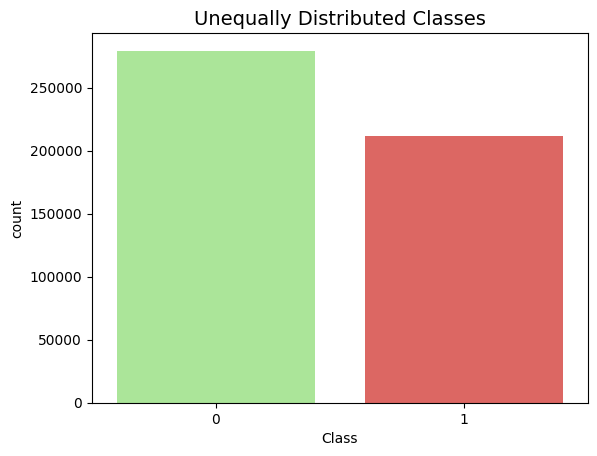

In [ ]:
sns.countplot(x='Class', data=outlier_free_over_sample_df, palette=['#A4F28C', "#F0544F"])
plt.title('Unequally Distributed Classes', fontsize=14)
plt.show()

###ML Modelling and Accuracy

Classifier: LogisticRegression
Confusion Matrix:
 [[83057  2092]
 [ 6671 78769]]
F1 Score:  0.9485962382881585
Precision:  0.9499321097091316
Recall:  0.948630919930359
Accuracy:  0.948630919930359
-----------------------------

Classifier: DecisionTreeClassifier
Confusion Matrix:
 [[84889   260]
 [   87 85353]]
F1 Score:  0.9979658655764297
Precision:  0.9979679127429131
Recall:  0.997965871187474
Accuracy:  0.997965871187474
-----------------------------



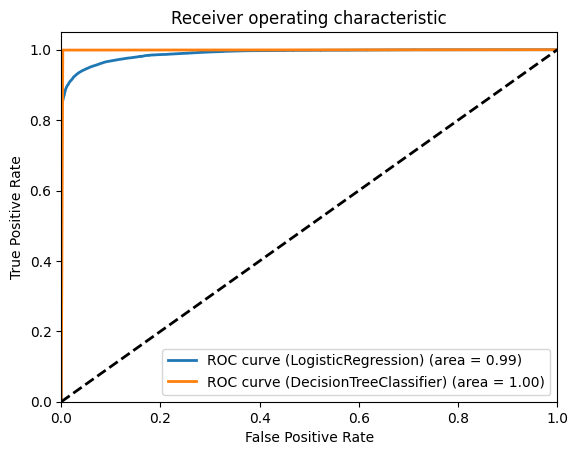

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

X = over_sample_df.drop('Class', axis=1)
y = over_sample_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    "LogisticRegression": LogisticRegression(),
    # "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Plotting ROC curve settings
plt.figure()

for key, classifier in classifiers.items():
    model = classifier
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    y_score = model.predict_proba(X_test)[:, 1]  # fetch probabilities for the positive class

    # Compute metrics
    confusion_mat = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Classifier: {key}")
    print("Confusion Matrix:\n", confusion_mat)
    print("F1 Score: ", f1)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Accuracy: ", accuracy)
    print("-----------------------------\n")
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve ({key}) (area = {roc_auc:.2f})')

# Plotting ROC curve settings
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

###DL/NN Modelling and Accuracy

Epoch 1/10
12439/12439 [==============================] - 66s 5ms/step - loss: 0.0382 - accuracy: 0.9865 - val_loss: 0.0115 - val_accuracy: 0.9978
Epoch 2/10
12439/12439 [==============================] - 59s 5ms/step - loss: 0.0090 - accuracy: 0.9980 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 3/10
12439/12439 [==============================] - 63s 5ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.0056 - val_accuracy: 0.9987
Epoch 4/10
12439/12439 [==============================] - 71s 6ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 5/10
12439/12439 [==============================] - 60s 5ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0063 - val_accuracy: 0.9985
Epoch 6/10
12439/12439 [==============================] - 60s 5ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9988
Epoch 7/10
12439/12439 [==============================] - 59s 5ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0

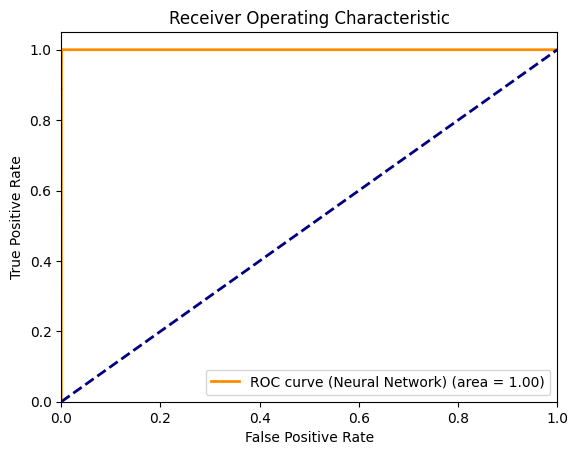

Time taken to run the model: 628.4116504192352 seconds.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import time

model = Sequential(
    [
        InputLayer(input_shape=(30,)),
        Dense(25, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)
start = time.time()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)
NN_pred = model.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in NN_pred]
confusion_mat = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Classifier: Neural Network")
print("Confusion Matrix:\n", confusion_mat)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)
print("-----------------------------\n")


fpr, tpr, _ = roc_curve(y_test, NN_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Neural Network) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f'Time taken to run the model: {end - start} seconds.')


#Modelling on GPU

In [ ]:
import torch
import torch.nn as nn
import os
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from torch import optim
import time

input_size = 30
hidden_size = 25
hidden_size2 = 10
output_size = 1

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

class NeuralNetwork(nn.Module):
    def __init__(self,nonlin):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

        if nonlin == 'relu':
            self.nonlin = nn.ReLU()
        elif nonlin == 'sigmoid':
            self.nonlin = nn.Sigmoid()
        elif nonlin == 'tanh':
            self.nonlin = nn.Tanh()
        elif nonlin == 'swish':
            self.nonlin = nn.SiLU()

    def forward(self, x):
        x = self.nonlin(self.fc1(x))
        x = self.nonlin(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

Epoch [1/10], Loss: 0.7002, acc: 0.5466
Epoch [2/10], Loss: 0.5738, acc: 0.8456
Epoch [3/10], Loss: 0.5137, acc: 0.8500
Epoch [4/10], Loss: 0.4720, acc: 0.8543
Epoch [5/10], Loss: 0.4414, acc: 0.8592
Epoch [6/10], Loss: 0.4192, acc: 0.8649
Epoch [7/10], Loss: 0.4021, acc: 0.8724
Epoch [8/10], Loss: 0.3880, acc: 0.8828
Epoch [9/10], Loss: 0.3752, acc: 0.8931
Epoch [10/10], Loss: 0.3628, acc: 0.9045
 Accuracy on the test dataset: 91 %
Classifier: Neural Network
Confusion Matrix:
 [[76610  8539]
 [ 5927 79513]]
F1 Score:  0.9151775879847619
Precision:  0.9155850323034187
Recall:  0.9151996904841461
Accuracy:  0.9151996904841461
-----------------------------

Time taken to run the model: 0.49202609062194824 seconds.


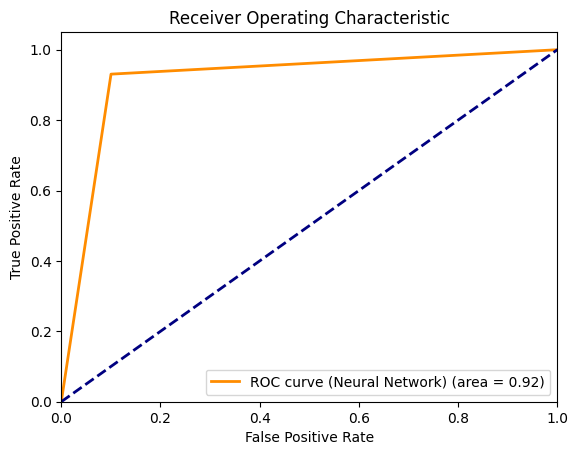

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = NeuralNetwork('relu')
model.to(device)

bce_loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

X_train_torch = torch.from_numpy(X_train.to_numpy()).float().to(device)
y_train_torch = torch.from_numpy(y_train.to_numpy()).unsqueeze(1).float().to(device)
X_test_torch = torch.from_numpy(X_test.to_numpy()).float().to(device)
y_test_torch = torch.from_numpy(y_test.to_numpy()).unsqueeze(1).float().to(device)

def fit():
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(X_train_torch)
        loss = bce_loss(outputs, y_train_torch)
        loss.backward()
        optimizer.step()

        running_loss = loss.item() * X_train_torch.size(0)
        predicted = torch.round(outputs)
        correct = (predicted == y_train_torch).sum().item()
        running_acc = correct / len(y_train_torch)

        print (f'Epoch [{epoch+1}/{10}], Loss: {running_loss/len(X_train_torch):.4f}, acc: {running_acc:.4f}')

def predict():
    with torch.no_grad():
        outputs = model(X_test_torch)
        predicted = torch.round(outputs).cpu().numpy()

    total = y_test_torch.size(0)
    correct = (predicted == y_test_torch.cpu().numpy()).sum()
    print(' Accuracy on the test dataset: %d %%' % (100 * correct / total))
    return predicted


start = time.time()
fit()
preds_np = predict()

confusion_mat = confusion_matrix(y_test_torch.cpu().numpy(), preds_np)
f1 = f1_score(y_test_torch.cpu().numpy(), preds_np, average='weighted')
precision = precision_score(y_test_torch.cpu().numpy(), preds_np, average='weighted')
recall = recall_score(y_test_torch.cpu().numpy(), preds_np, average='weighted')
accuracy = accuracy_score(y_test_torch.cpu().numpy(), preds_np)
end = time.time()

print(f"Classifier: Neural Network")
print("Confusion Matrix:\n", confusion_mat)
print("F1 Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy: ", accuracy)
print("-----------------------------\n")

print(f'Time taken to run the model: {end - start} seconds.')

fpr, tpr, _ = roc_curve(y_test, preds_np)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Neural Network) (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


##Conclusion


---
Neural Network performs comparatively well. Only drawback is that, important parameter or paramaters perfomring well cannot be deduced.

Oversampling using SMOTE is more appropriate approach working with the unbalanced dataset.